#Model Evaluation

##Install Libraries

In [1]:
pip install matplotlib scikit-learn seaborn numpy google.colab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.5 MB/s eta 0:00:00


## Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from google.colab import drive
drive.mount('/content/drive')
%run '/content/drive/My Drive/Colab Notebooks/model_development2.ipynb'

Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.8214285671710968

Best val_accuracy So Far: 0.8214285671710968
Total elapsed time: 00h 01m 02s
Epoch 1/50
10/10 [==============================] - 2s 47ms/step - loss: 0.4192 - accuracy: 0.8081 - val_loss: 0.3443 - val_accuracy: 0.7600
Epoch 2/50
10/10 [==============================] - 0s 12ms/step - loss: 0.4185 - accuracy: 0.7980 - val_loss: 0.4539 - val_accuracy: 0.7200
Epoch 3/50
10/10 [==============================] - 0s 12ms/step - loss: 0.3160 - accuracy: 0.8586 - val_loss: 0.2748 - val_accuracy: 0.8400
Epoch 4/50
10/10 [==============================] - 0s 13ms/step - loss: 0.3199 - accuracy: 0.8586 - val_loss: 0.2512 - val_accuracy: 0.9200
Epoch 5/50
10/10 [==============================] - 0s 18ms/step - loss: 0.4073 - accuracy: 0.8081 - val_loss: 0.3399 - val_accuracy: 0.7600
Epoch 6/50
10/10 [==============================] - 0s 14ms/step - loss: 0.2857 - accuracy: 0.8788 - val_loss: 0.2734 - val_accuracy: 0.8000
Epoch 7/50


##Graph

In [3]:


def evaluate_simple_model(model, X_test, Y_test, class_labels):

    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)

    accuracy = accuracy_score(Y_true, Y_pred_classes)
    print(f'Accuracy: {accuracy * 100:.2f}%')


    actual_counts = [np.sum(Y_true == i) for i in range(len(class_labels))]
    predicted_counts = [np.sum(Y_pred_classes == i) for i in range(len(class_labels))]


    fig, ax = plt.subplots()
    index = np.arange(len(class_labels))
    bar_width = 0.2

    rects1 = ax.bar(index, actual_counts, bar_width, label='Actual')
    rects2 = ax.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

    ax.set_xlabel('Class')
    ax.set_ylabel('Counts')
    ax.set_title('Actual vs Predicted Class Counts')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(class_labels)
    ax.legend()

    plt.show()



2/2 [==============================] - 0s 23ms/step
Accuracy: 92.86%


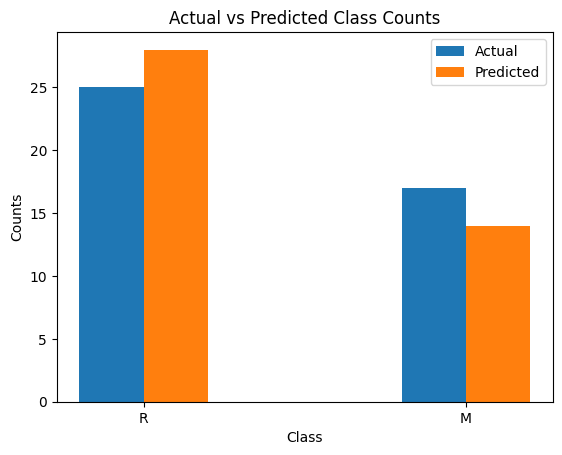

In [4]:
evaluate_simple_model(best_model, X_test, Y_test, class_labels=['R', 'M'])


##Numbers

In [5]:
def evaluate_model_with_scores(model, X_test, Y_test, class_labels):

    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)

    accuracy = accuracy_score(Y_true, Y_pred_classes)
    print(f'Overall Accuracy: {accuracy * 100:.2f}%')


    precision, recall, fscore, _ = precision_recall_fscore_support(Y_true, Y_pred_classes, average=None, labels=range(len(class_labels)))


    print("\nScores by class:")
    for i, label in enumerate(class_labels):
        print(f"{label}:")
        print(f"  Precision: {precision[i]:.2f}")
        print(f"  Recall: {recall[i]:.2f}")
        print(f"  F1-Score: {fscore[i]:.2f}")



In [6]:
evaluate_model_with_scores(best_model, X_test, Y_test, class_labels=['R', 'M'])

2/2 [==============================] - 0s 6ms/step
Overall Accuracy: 92.86%

Scores by class:
R:
  Precision: 0.89
  Recall: 1.00
  F1-Score: 0.94
M:
  Precision: 1.00
  Recall: 0.82
  F1-Score: 0.90
